In [1]:
"""
All formfactors available in BornAgain in the Born Approximation
"""
import numpy
import bornagain as ba
from bornagain import deg, angstrom
import matplotlib
from matplotlib import pyplot as plt

phi_min, phi_max = -2.0, 2.0
alpha_min, alpha_max = 0.0, 2.0

def get_sample(formfactor):
    """
    Returns a one-layer sample that contains particles with given form factor.
    """
    # defining materials
    m_ambience = ba.HomogeneousMaterial("Air", 0.0, 0.0)
    m_particle = ba.HomogeneousMaterial("Particle", 6e-4, 2e-8)

    # collection of particles
    particle = ba.Particle(m_particle, formfactor)
    particle_layout = ba.ParticleLayout()
    particle_layout.addParticle(particle, 1.0)

    air_layer = ba.Layer(m_ambience)
    air_layer.addLayout(particle_layout)

    multi_layer = ba.MultiLayer()
    multi_layer.addLayer(air_layer)
    return multi_layer


def get_simulation():
    """
    Returns GISAXS simulation with standard beam and detector.
    """
    simulation = ba.GISASSimulation()
    simulation.setDetectorParameters(
        100, phi_min*deg, phi_max*deg, 100, alpha_min*deg, alpha_max*deg)
    simulation.setBeamParameters(1.0*angstrom, 0.2*deg, 0.0*deg)
    return simulation


def simulate(ff):
    """
    Runs simulation for one form factor, and returns simulated intensity pattern
    """
    sample = get_sample(ff)
    simulation = get_simulation()
    simulation.setSample(sample)
    simulation.runSimulation()
    return simulation.getIntensityData()


def plot(result, nframe, name):
    """
    Plots simulated detector image 'result' to position number 'nframe' on canvas.
    """
    plt.subplot(5, 5, nframe)
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    im = plt.imshow(
        result.getArray(),
        norm=matplotlib.colors.LogNorm(1.0, result.getMaximum()),
        extent=[result.getXmin()/deg, result.getXmax()/deg,
                result.getYmin()/deg, result.getYmax()/deg],
        aspect='auto')
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.tick_params(axis='both', which='minor', labelsize=6)
    plt.xticks(numpy.arange(phi_min, phi_max+0.0001, 1.0))
    plt.text(-0.1, 2.17, name, horizontalalignment='center',
             verticalalignment='center', fontsize=11)


Generating intensity map for AnisoPyramid
Generating intensity map for Box
Generating intensity map for Cone
Generating intensity map for Cone6
Generating intensity map for Cuboctahedron
Generating intensity map for Cylinder
Generating intensity map for Dodecahedron
Generating intensity map for EllipsoidalCylinder
Generating intensity map for FullSphere
Generating intensity map for FullSpheroid
Generating intensity map for HemiEllipsoid
Generating intensity map for Icosahedron
Generating intensity map for Prism3
Generating intensity map for Prism6
Generating intensity map for Pyramid
Generating intensity map for Ripple1
Generating intensity map for Ripple2
Generating intensity map for Tetrahedron
Generating intensity map for TruncatedSphere
Generating intensity map for TruncatedSpheroid
Generating intensity map for TruncatedCube


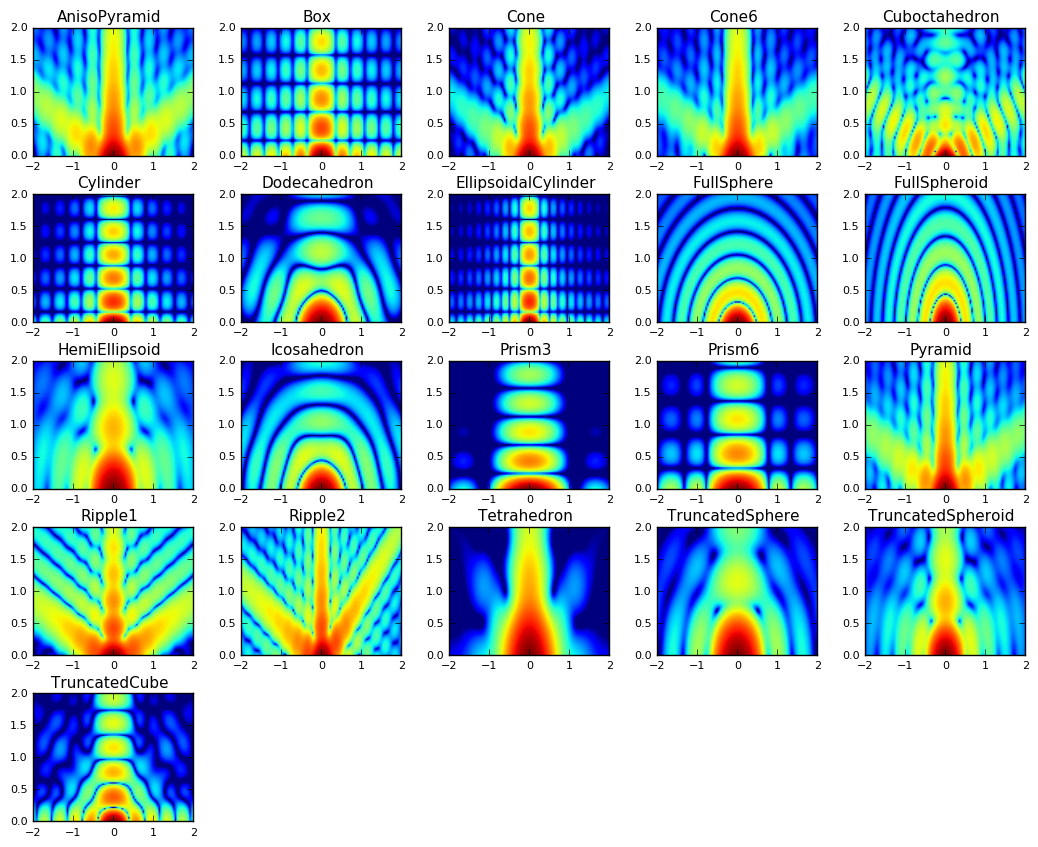

In [2]:
"""
Runs one simulation for each form factor, and plots results on a single canvas.
"""
formfactors = [
    ba.FormFactorAnisoPyramid(20.0, 16.0, 13.0, 60.0*deg),
    ba.FormFactorBox(20.0, 16.0, 13.0),
    ba.FormFactorCone(10.0, 13.0, 60.0*deg),
    ba.FormFactorCone6(10.0, 13.0, 60.0*deg),
    ba.FormFactorCuboctahedron(20.0, 13.0, 0.7, 60.0*deg),
    ba.FormFactorCylinder(8.0, 16.0),
    ba.FormFactorDodecahedron(5.0),
    ba.FormFactorEllipsoidalCylinder(8.0, 13.0, 16.0),
    ba.FormFactorFullSphere(8.0),
    ba.FormFactorFullSpheroid(10.0, 13.0),
    ba.FormFactorHemiEllipsoid(10.0, 6.0, 8.0),
    ba.FormFactorIcosahedron(8.0),
    ba.FormFactorPrism3(10.0, 13.0),
    ba.FormFactorPrism6(5.0, 11.0),
    ba.FormFactorPyramid(18.0, 13.0, 60.0*deg),
    ba.FormFactorRipple1(27.0, 20.0, 14.0),
    ba.FormFactorRipple2(36.0, 25.0, 14.0, 3.0),
    ba.FormFactorTetrahedron(15.0, 6.0, 60.0*deg),
    ba.FormFactorTruncatedSphere(5.0, 7.0),
    ba.FormFactorTruncatedSpheroid(7.5, 9.0, 1.2),
    ba.FormFactorTruncatedCube(15.0, 6.0)
]

plt.figure(figsize=(12.80, 10.24))
for nplot in range(len(formfactors)):
    ff = formfactors[nplot]
    name = ff.__class__.__name__.replace("FormFactor","")
    print("Generating intensity map for " + name)
    intensities = simulate(ff)
    plot(intensities, nplot+1, name)
plt.show()
